In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# data_file = '/Users/iwoods/OneDrive - Ithaca College/tardi_als_kat_2022/lead_nitrate_data.xlsx'
data_file = '/Users/iwoods/OneDrive - Ithaca College/tardigrade_tracks_2022/video data summaries.xlsx'
sheet = '17Nov_3IY_LDOPA'
control_type = 'X'
treatment_type = 'Y'
control_description = '3-IY'
treatment_description = '3-IY & L-DOPA'
data = pd.read_excel(data_file, sheet_name = sheet)
data.head(3)

,Clip,Scale,Initials,Date,Treatment,Tardigrade,ClipDuration,ClipArea,VidArea,Distance,Turns,AngleSpace,Stops,Include
0,AC_17Nov_X_tardigrade1-1,448.0,AC,2022-11-17,X,1,23.80,4236.5,3968.75,658.80,2,341.17,1,True
1,AC_17Nov_X_tardigrade1-2,448.0,AC,2022-11-17,X,1,31.93,4015.0,3968.75,829.26,2,461.24,1,True
2,AC_17Nov_X_tardigrade1-3,448.0,AC,2022-11-17,X,1,35.83,3727.5,3968.75,971.31,2,563.12,2,True


In [3]:
control = data[(data.Treatment==control_type) & (data.Include == True)]
treatment = data[(data.Treatment==treatment_type) & (data.Include == True)]
print(len(data), len(control), len(treatment), len(control)+len(treatment))

258 90 78 168


In [4]:
people = sorted(np.unique(data.Initials.values))
print(people)

['AC', 'EL', 'GI', 'IG', 'IW', 'LA']


In [5]:
def extractData(df, areas, durations, speed, turns, angles, stops):
    
    scale = df.Scale.values[0]
    # area
    a = np.median(df.VidArea.values)
    scaled_a = a / (scale**2)
    areas = np.append(areas, scaled_a)
    
    # duration
    dur = df.ClipDuration.values
    durations = np.append(durations, np.sum(dur))
    
    # speed
    dist = df.Distance.values
    scaled_dist = dist / scale
    speed = np.append(speed, np.sum(scaled_dist) / np.sum(dur))
    
    # turns
    turn = df.Turns.values
    turns = np.append(turns, np.sum(turn) / np.sum(dur))
    
    # angles
    angle = df.AngleSpace.values
    angles = np.append(angles, np.sum(angle) / np.sum(dur))
    
    # stops
    stop = df.Stops.values
    stops = np.append(stops, np.sum(stop) / np.sum(dur))
    
    return areas, durations, speed, turns, angles, stops

In [6]:
# set up empty arrays

areas_control = np.array([])
durations_control = np.array([])
speed_control = np.array([])
turns_control = np.array([])
angles_control = np.array([])
stops_control = np.array([])

areas_treatment = np.array([])
durations_treatment = np.array([])
speed_treatment = np.array([])
turns_treatment = np.array([])
angles_treatment = np.array([])
stops_treatment = np.array([])

for p in people:
    
    control_data_person   = control[control.Initials == p]
    treatment_data_person = treatment[treatment.Initials == p]
    
    # collect data for control
    control_tardigrades = sorted(np.unique(control_data_person.Tardigrade.values))
    print('control')
    for t in control_tardigrades:
        
        tardigrade_data = control_data_person[control_data_person.Tardigrade == t]
        
        areas_control, durations_control, speed_control, turns_control, angles_control, stops_control = \
        extractData(tardigrade_data, areas_control, durations_control, speed_control, turns_control, angles_control, stops_control)
        print(p,t,len(areas_control))
    
    # extract data for treatment
    treatment_tardigrades = sorted(np.unique(treatment_data_person.Tardigrade.values))
    
    print('treatment')
    for t in treatment_tardigrades:

        tardigrade_data = treatment_data_person[treatment_data_person.Tardigrade == t]
        
        areas_treatment, durations_treatment, speed_treatment, turns_treatment, angles_treatment, stops_treatment = \
        extractData(tardigrade_data, areas_treatment, durations_treatment, speed_treatment, turns_treatment, angles_treatment, stops_treatment)
        print(p,t,len(areas_treatment))

print(len(durations_control))
print(len(durations_treatment))

control
AC 1 1
AC 2 2
AC 3 3
treatment
AC 1 1
AC 2 2
AC 3 3
control
EL 1 4
EL 2 5
EL 3 6
treatment
EL 1 4
EL 2 5
EL 3 6
control
GI 1 7
GI 2 8
GI 3 9
treatment
GI 1 7
GI 2 8
GI 3 9
control
IG 1 10
IG 2 11
IG 3 12
treatment
IG 1 10
IG 2 11
IG 3 12
control
IW 1 13
IW 2 14
IW 3 15
IW 4 16
IW 5 17
IW 6 18
treatment
IW 1 13
IW 2 14
IW 3 15
IW 4 16
IW 5 17
IW 6 18
control
LA 1 19
LA 2 20
LA 3 21
treatment
LA 1 19
LA 2 20
21
20


In [7]:
print(len(durations_control), np.sum(durations_control), durations_control)
print(len(durations_treatment), np.sum(durations_treatment), durations_treatment)

21 2145.8500000000004 [103.77  22.7   79.97  74.25  88.45  78.3   96.47 100.71  71.67 170.94
  87.93 133.44 104.56  97.93 164.32 137.84  95.96 117.7  117.93  88.7
 112.31]
20 2229.47 [ 70.46 106.5   99.74  93.02  93.04 111.17  85.28 105.1   61.23 222.63
 134.5   53.6  114.7  130.39 129.7  135.37 109.3  158.8   94.21 120.73]


In [8]:
# points to scatter on boxplot
def wobbleAround(center,number,distAway):
    # to find points to add to box/whisker plots, centered around midline of box
    import random
    l=[]
    while len(l) < number:
        l.append(random.uniform(center-distAway, center+distAway))
    return l

# format colors of a boxplot object
def formatBoxColors(bp, boxColors):

    baseWidth = 3
    for n,box in enumerate(bp['boxes']):
        box.set( color=boxColors[n], linewidth=baseWidth)

    for n,med in enumerate(bp['medians']):
        med.set( color=boxColors[n], linewidth=baseWidth)

    bdupes=[]
    for i in boxColors:
        bdupes.extend([i,i])

    boxColors = bdupes
    for n,whisk in enumerate(bp['whiskers']):
        #whisk.set( color=(0.1,0.1,0.1), linewidth=2, alpha = 0.5)
        whisk.set( color=boxColors[n], linewidth=baseWidth, alpha = 0.5)

    for n,cap in enumerate(bp['caps']):
        cap.set( color=boxColors[n], linewidth=baseWidth, alpha = 0.5)

    return bp

# stats from boxplot data
def statsFromBoxData(boxData,statTest):
    pvals = []

    for i in range(len(boxData)):
        for j in range(i+1,len(boxData)):
            if statTest in ['k','kruskal','kruskalwallis','kw']:
                _,p = stats.kruskal(boxData[i],boxData[j])
                print('%i vs. %i: %1.3f by Kruskal-Wallis' % (i+1,j+1,p))
                pvals.append(p)
            if statTest in ['t','tt','ttest']:
                _,p = stats.ttest_ind(boxData[i],boxData[j])
                print('p = %1.3f (%i vs. %i; ttest-ind)' % (p,i+1,j+1))
                pvals.append(p)
            # MORE STAT TESTS?
    print('')

    return pvals

p = 0.957 (1 vs. 2; ttest-ind)



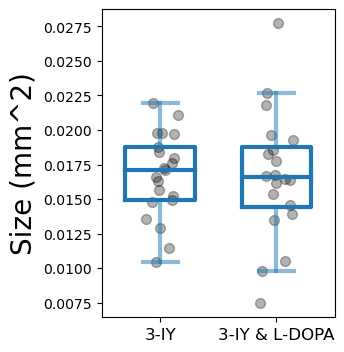

In [14]:
data_to_plot = 'areas' # areas speed turns angles stops
if data_to_plot == 'areas':
    ylab = 'Size (mm^2)'
    toplot = [areas_control, areas_treatment]
elif data_to_plot == 'speed':
    ylab = 'Speed (mm/sec)'
    toplot = [speed_control, speed_treatment]
elif data_to_plot == 'turns':
    toplot = [turns_control, turns_treatment]
    ylab = 'Turns / sec'
elif data_to_plot == 'angles':
    toplot = [angles_control, angles_treatment]
    ylab = 'Trajectories (degrees/s)'
else: # 'stops'
    toplot = [stops_control,stops_treatment]
    ylab = 'Stops / sec'

statsFromBoxData(toplot,'t')
# xlabs = [control_type, treatment_type]
xlabs = [control_description, treatment_description]
marker_size = 50

f = plt.figure(figsize=(3,4))
scatterColors = ['k','k']
boxColors = ['tab:blue','tab:blue']

for i in np.arange(len(toplot)):
    
    xplot = wobbleAround(i+1,len(toplot[i]),0.15)
    plt.scatter(xplot, toplot[i], s=marker_size, c=scatterColors[i], alpha=0.3)

bp = plt.boxplot(toplot, showfliers = False, widths = 0.6)
bp = formatBoxColors(bp,boxColors)

plt.xticks([1,2],xlabs,fontsize=12)
plt.ylabel(ylab,fontsize=20)
plt.show()

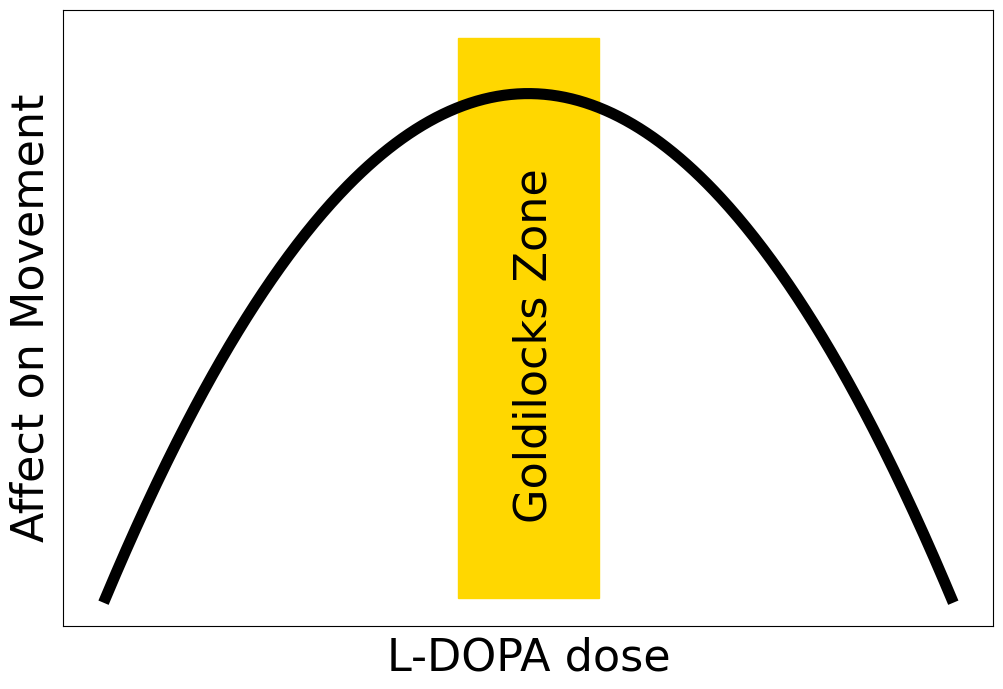

In [10]:
# inverted U - goldilocks
from matplotlib.patches import Rectangle
f,a = plt.subplots(figsize=(12,8))
x = np.linspace(1,7,500)
y = -x**2 + 8 * x - 3
a.add_patch(Rectangle((3.5,4),1,10, color='gold')) # lemonchiffon
a.plot(x,y, linewidth = 8, color = 'k')
a.set_xticks([])
a.set_yticks([])
a.set_ylabel('Affect on Movement', fontsize=32)
a.set_xlabel('L-DOPA dose', fontsize=32)
plt.text(3.89,5.5,'Goldilocks Zone', rotation = 90, fontsize=32)
plt.show()